In [107]:
# This file visualizes the results of the questionnaire regarding the preferred metadata export standard (see https://kb.umwelt.info/?controller=TaskViewController&action=show&task_id=1052)

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

# This is the raw table exported from https://terminplaner4.dfn.de/XzKRFWtJMspgNbO4
# The file needs to be fetched from \\gruppende\umwelt.info\int\Zusammenarbeit\Exportstandard\Metadatenstandard für den Export von umwelt.info.csv
with open(
    "/home/ubuntu/data-stories/metadata/notebooks/Data/Metadatenstandard für den Export von umwelt.info.csv",
    newline="",
) as f:
    reader = csv.reader(f)
    votes = list(reader)

In [108]:
# Add additional votes from emails and comments

# Additional votes
# NMZB: B, F, H, DataCite
# HMC: E, F, G, DataCite mit OAI-PMH Schnittstelle, XML und JSON, zukünftig im JSON-LD
# Martin Klenke: OGC Records OGC API
# P. Saile: OGC API Records
# SNSB: bioschemas.org, DwC als EML bzw. DwC-A, OAI-PMH
# Global Terrestrial Network - Hydrology: WMO/OGC Standards
# Claudia: DataCite, OAI-PMH
# Gerd Arns-Krogmann: DataCite, GeoDCAT-AP
# FITKO: LDES

# Additional columns
# L: DataCite (mit OAI-PMH Schnittstelle, XML und JSON, zukünftig im JSON-LD)
# M: DwC als EML bzw. DwC-A
# N: bioschemas.org
# O: OAI-PMH Schnittstelle (mit schemas.org)
# P: OGC API - Records
# Q: WMO/OGC Standards
# R: LDES
# S: GeoDCAT-AP

# Add missing participants
votes.append(
    [
        "HMC",
        "",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Ja",
        "Ja",
        "Ja",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Ja",
    ]
)
votes.append(
    [
        "NMZB",
        "",
        "Nein",
        "Ja",
        "Nein",
        "Nein",
        "Nein",
        "Ja",
        "Nein",
        "Ja",
        "Nein",
        "Nein",
        "Nein",
        "Ja",
    ]
)
votes.append(
    [
        "Martin Klenke",
        "",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
    ]
)
votes.append(
    [
        "P. Saile",
        "",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
        "Nein",
    ]
)

df = pd.DataFrame(
    votes,
    columns=["Name", "", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L"],
)
df = df.drop(0)

# Add missing voting options
df["M"] = np.nan
df["N"] = np.nan
df["O"] = np.nan
df["P"] = np.nan
df["Q"] = np.nan
df["R"] = np.nan
df["S"] = np.nan

df.loc[df["Name"] == "SNSB", ["M", "N", "O"]] = "Ja"
df.loc[df["Name"] == "Global Terrestrial Network - Hydrology", ["Q"]] = "Ja"
df.loc[df["Name"] == "Claudia", ["L", "O"]] = "Ja"
df.loc[df["Name"] == "Arns-Krogmann (BGR)", ["L", "S"]] = "Ja"
df.loc[df["Name"] == "Matthias Grönewald (FITKO)", ["R"]] = "Ja"
df.loc[df["Name"] == "Martin Klenke", ["P"]] = "Ja"
df.loc[df["Name"] == "P. Saile", ["P"]] = "Ja"

/tmp/ipykernel_6472/1733917332.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Ja' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df["Name"] == "SNSB", ["M", "N", "O"]] = "Ja"
/tmp/ipykernel_6472/1733917332.py:114: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Ja' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df["Name"] == "Global Terrestrial Network - Hydrology", ["Q"]] = "Ja"
/tmp/ipykernel_6472/1733917332.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Ja' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df["Name"] == "Arns-Krogmann (BGR)", ["L", "S"]] = "Ja"
/tmp/ipykernel_6472/1733917332.py:117: FutureWarnin

<Figure size 1000x600 with 0 Axes>

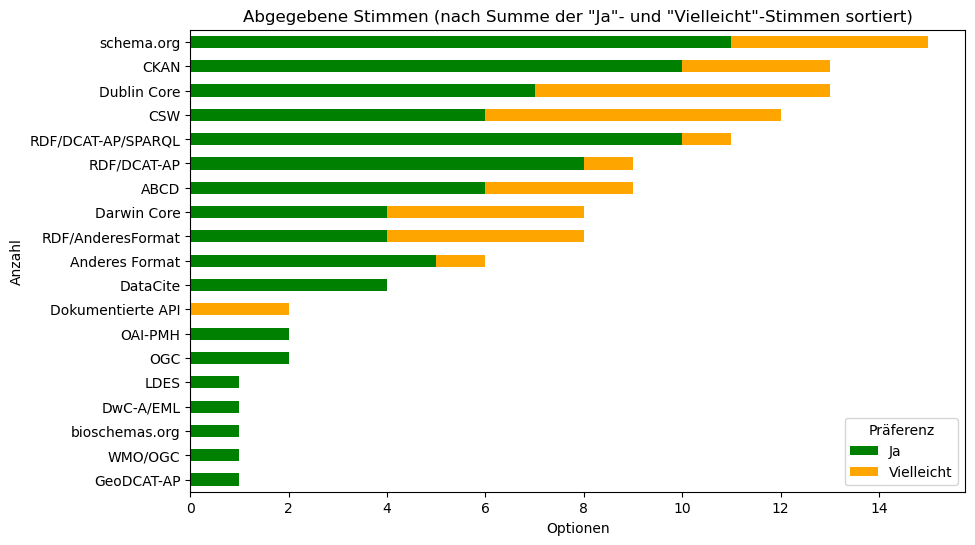

In [109]:
df.set_index("Name", inplace=True)
df = df.rename(
    columns={
        "A": "RDF/DCAT-AP",
        "B": "RDF/DCAT-AP/SPARQL",
        "C": "RDF/AnderesFormat",
        "D": "CKAN",
        "E": "CSW",
        "F": "schema.org",
        "G": "Dublin Core",
        "H": "Darwin Core",
        "I": "ABCD",
        "J": "Dokumentierte API",
        "K": "Anderes Format",
        "L": "DataCite",
        "M": "DwC-A/EML",
        "N": "bioschemas.org",
        "O": "OAI-PMH",
        "P": "OGC",
        "Q": "WMO/OGC",
        "R": "LDES",
        "S": "GeoDCAT-AP",
    }
)
df = df.loc[:, "RDF/DCAT-AP":"GeoDCAT-AP"].T


ja_counts = df.isin(["Ja"]).sum(axis=1)
unter_vorbehalt_counts = df.isin(["Unter Vorbehalt"]).sum(axis=1)

count_df = pd.DataFrame({"Ja": ja_counts, "Vielleicht": unter_vorbehalt_counts})

count_df["Total"] = count_df["Ja"] + count_df["Vielleicht"]

count_df_sorted = count_df.sort_values(by="Total", ascending=True).drop(columns="Total")

fig = plt.figure(figsize=(10, 6))
count_df_sorted.plot(
    kind="barh", stacked=True, color=["green", "orange"], figsize=(10, 6)
)

plt.title('Abgegebene Stimmen (nach Summe der "Ja"- und "Vielleicht"-Stimmen sortiert)')
plt.xticks(rotation=0)
plt.xlabel("Optionen")
plt.ylabel("Anzahl")
plt.legend(title="Präferenz")
plt.savefig("Exportstandardumfrage.png", bbox_inches="tight")
plt.show()